# Greedy Algorithm

## Setup

In [1]:
from graphs_2d import *

## Graph Definition

networkx.classes.graph.Graph

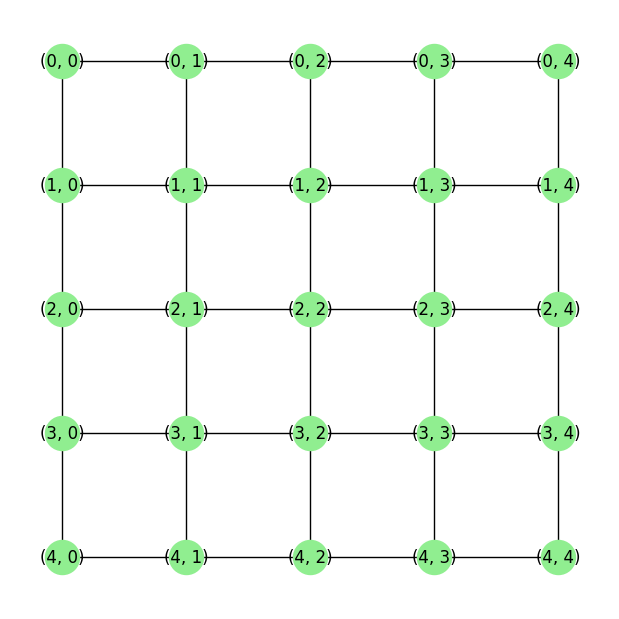

In [2]:
# Generate a single graph
rows, cols = 5, 5
grid_graph = generate_2D_grid_graph(rows, cols)
adjacency_matrix = nx.adjacency_matrix(grid_graph).todense()

plot_graph(grid_graph)

type(grid_graph)

## Starting Node Selection

### Weighted Select

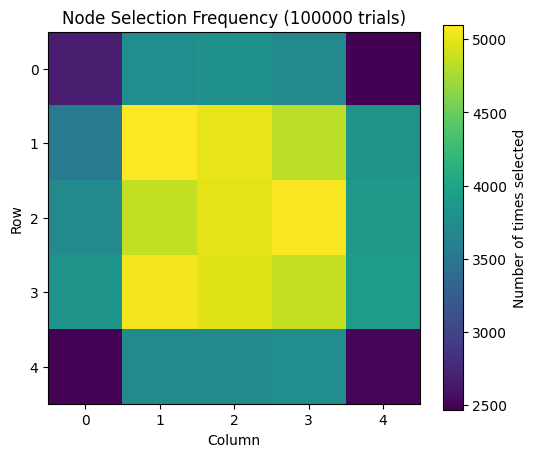

In [3]:
# Run the selection 10000 times
counts = np.zeros(len(grid_graph.nodes()))
for _ in range(100000):
    node = select_starting_node_8way_probablistic(grid_graph)
    node_index = list(grid_graph.nodes()).index(node)
    counts[node_index] += 1

# Reshape counts to match the grid for visualization
counts_matrix = counts.reshape((rows, cols))

plt.figure(figsize=(6, 5))
plt.imshow(counts_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of times selected')
plt.title('Node Selection Frequency (100000 trials)')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

### Equal Select From Highest Neighbors

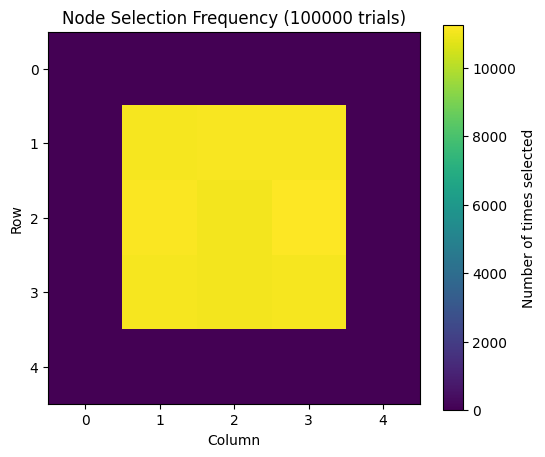

In [4]:
# Run the selection 10000 times
counts = np.zeros(len(grid_graph.nodes()))
for _ in range(100000):
    node = select_starting_node_max_neighbors(grid_graph)
    node_index = list(grid_graph.nodes()).index(node)
    counts[node_index] += 1

# Reshape counts to match the grid for visualization
counts_matrix = counts.reshape((rows, cols))

plt.figure(figsize=(6, 5))
plt.imshow(counts_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of times selected')
plt.title('Node Selection Frequency (100000 trials)')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

## Finding MCDS

### Greedy Algorithm Function

In [5]:
def greedy_connected_dominating_set(G, start_node):
    dominating_set = set([start_node])
    dominated = set([start_node])
    dominated.update(adjacent_8(G, start_node))

    # While not all nodes are dominated
    while len(dominated) < G.number_of_nodes():
        # Candidates: nodes adjacent (4-way) to the dominating set, not already in it
        candidates = set()
        for node in dominating_set:
            for neighbor in adjacent_4(G, node):
                if neighbor not in dominating_set:
                    candidates.add(neighbor)
        # For each candidate, count how many new nodes it would dominate
        best_candidate = None
        max_new = -1
        for candidate in candidates:
            new_dominated = set(adjacent_8(G, candidate) + [candidate]) - dominated
            if len(new_dominated) > max_new:
                max_new = len(new_dominated)
                best_candidate = candidate
        # Add the best candidate to the dominating set
        if best_candidate is not None:
            dominating_set.add(best_candidate)
            dominated.update(adjacent_8(G, best_candidate))
            dominated.add(best_candidate)
        else:
            # If no candidate found (should not happen in a connected grid), break
            break
    return dominating_set

### Visualize Greedy Solution

{(1, 2), (3, 4), (2, 1), (3, 1), (1, 1), (2, 3), (3, 3), (2, 2), (1, 3)}


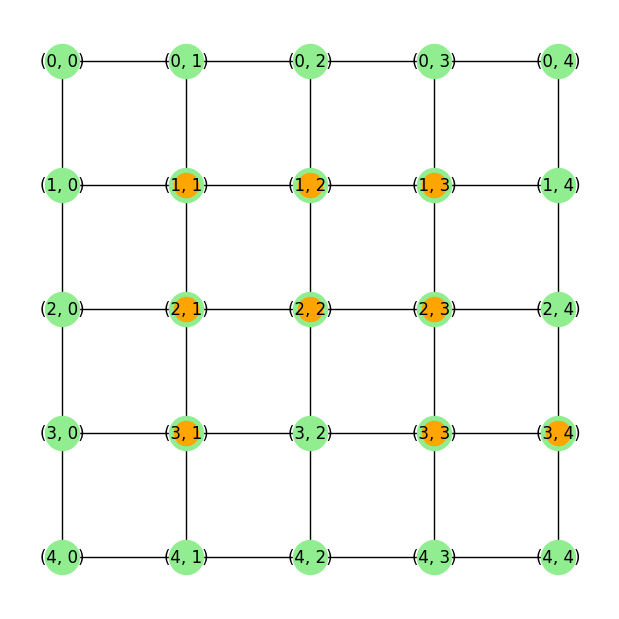

In [6]:
overlay_subset(grid_graph, greedy_connected_dominating_set(grid_graph, select_starting_node_8way_probablistic(grid_graph)))

{(1, 2), (2, 1), (3, 1), (1, 1), (3, 3), (3, 2), (1, 3)}


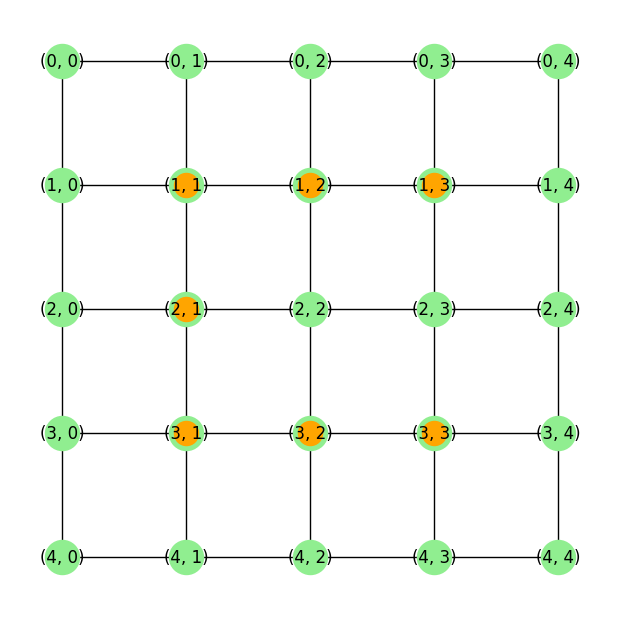

In [7]:
overlay_subset(grid_graph, greedy_connected_dominating_set(grid_graph, select_starting_node_max_neighbors(grid_graph)))

#### Probabilistic Greedy Algorithm Function

In [8]:
def probabilistic_greedy_connected_dominating_set(G, start_node):
    dominating_set = set([start_node])
    dominated = set([start_node])
    dominated.update(adjacent_8(G, start_node))

    while len(dominated) < G.number_of_nodes():
        # Candidates: nodes adjacent (4-way) to the dominating set, not already in it
        candidates = set()
        for node in dominating_set:
            for neighbor in adjacent_4(G, node):
                if neighbor not in dominating_set:
                    candidates.add(neighbor)
        if not candidates:
            break  # Should not happen in a connected grid

        # For each candidate, count how many new nodes it would dominate
        candidate_list = list(candidates)
        new_dominated_counts = []
        for candidate in candidate_list:
            new_dominated = set(adjacent_8(G, candidate) + [candidate]) - dominated
            new_dominated_counts.append(len(new_dominated))

        # If all candidates would dominate 0 new nodes, break
        if sum(new_dominated_counts) == 0:
            break

        # Select a candidate with probability proportional to new_dominated_counts
        selected_candidate = random.choices(candidate_list, weights=new_dominated_counts, k=1)[0]

        dominating_set.add(selected_candidate)
        dominated.update(adjacent_8(G, selected_candidate))
        dominated.add(selected_candidate)

    return dominating_set

#### Visualize Probabilistic Greedy Function

{(2, 1), (3, 1), (1, 1), (2, 0), (2, 3), (3, 3), (2, 2), (3, 2), (1, 3)}


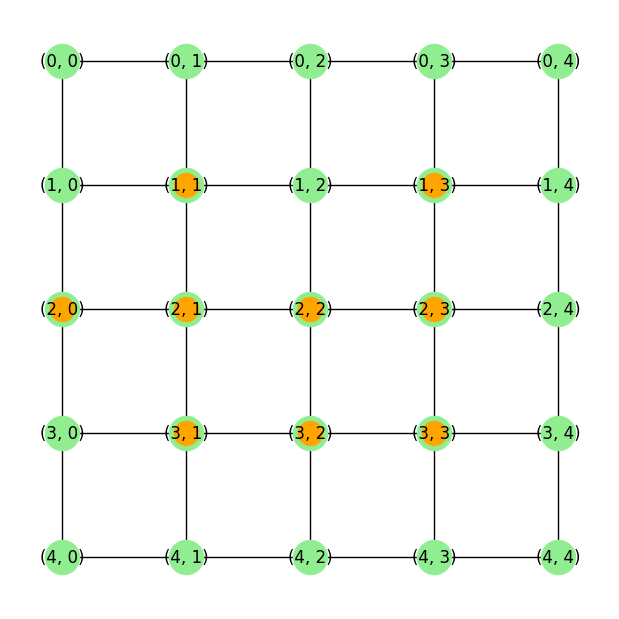

In [9]:
overlay_subset(grid_graph, probabilistic_greedy_connected_dominating_set(grid_graph, select_starting_node_8way_probablistic(grid_graph)))

### Comparisons

#### Comparison of Starting Node Selection Methods

Mean size of Probabilistic start greedy: 7.92, Time taken: 0.000329 seconds
Mean size of Maximum degree start greedy: 7.31, Time taken: 0.000294 seconds
Mean size of Maximum degree start probabilistic: 7.97, Time taken: 0.000369 seconds
Mean size of Probabilistic start probabilistic: 8.61, Time taken: 0.000399 seconds


C:\Users\there\AppData\Local\Temp\ipykernel_15744\3075748282.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


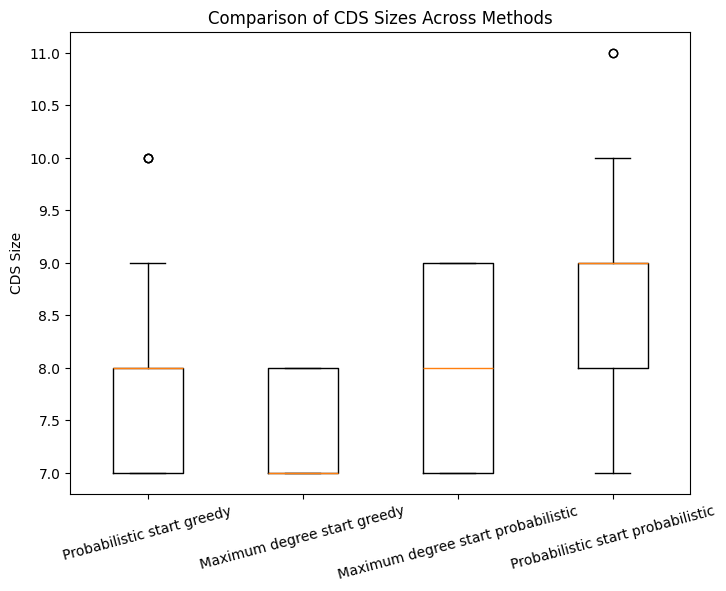

In [10]:
# Run many trials to compare average CDS size for both starting node selection methods
num_trials = 100

s1 = print_runtime_greedy("Probabilistic start greedy", select_starting_node_8way_probablistic, greedy_connected_dominating_set, grid_graph, num_trials)
s2 = print_runtime_greedy("Maximum degree start greedy", select_starting_node_max_neighbors, greedy_connected_dominating_set, grid_graph, num_trials)
s3 = print_runtime_greedy("Maximum degree start probabilistic", select_starting_node_max_neighbors, probabilistic_greedy_connected_dominating_set, grid_graph, num_trials)
s4 = print_runtime_greedy("Probabilistic start probabilistic", select_starting_node_8way_probablistic, probabilistic_greedy_connected_dominating_set, grid_graph, num_trials)

data = [s1, s2, s3, s4]
labels = [
    "Probabilistic start greedy",
    "Maximum degree start greedy",
    "Maximum degree start probabilistic",
    "Probabilistic start probabilistic"
]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.ylabel("CDS Size")
plt.title("Comparison of CDS Sizes Across Methods")
plt.xticks(rotation=15)
plt.show()

Mean size of Probabilistic start greedy: 33.51, Time taken: 0.004855 seconds
Mean size of Maximum degree start greedy: 33.06, Time taken: 0.004655 seconds
Mean size of Maximum degree start probabilistic: 40.18, Time taken: 0.006443 seconds
Mean size of Probabilistic start probabilistic: 40.56, Time taken: 0.005862 seconds


C:\Users\there\AppData\Local\Temp\ipykernel_15744\511644195.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


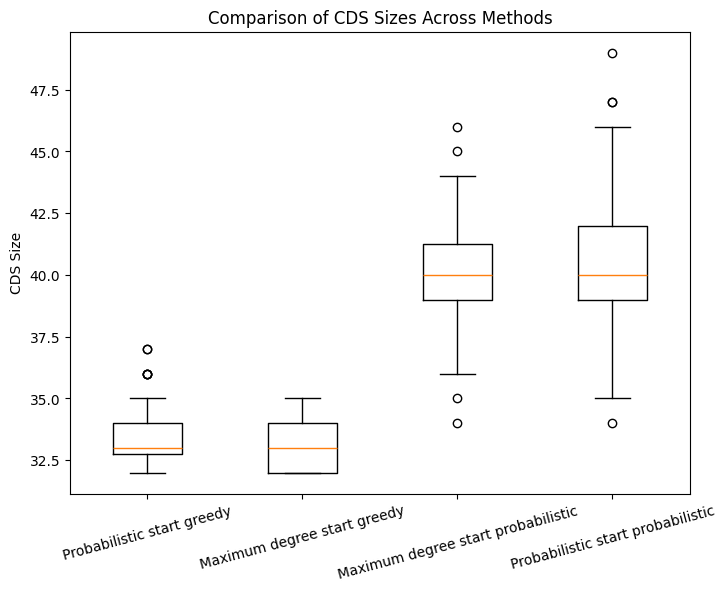

In [11]:
grid_graph = generate_2D_grid_graph(10, 10)

s1 = print_runtime_greedy("Probabilistic start greedy", select_starting_node_8way_probablistic, greedy_connected_dominating_set, grid_graph, num_trials)
s2 = print_runtime_greedy("Maximum degree start greedy", select_starting_node_max_neighbors, greedy_connected_dominating_set, grid_graph, num_trials)
s3 = print_runtime_greedy("Maximum degree start probabilistic", select_starting_node_max_neighbors, probabilistic_greedy_connected_dominating_set, grid_graph, num_trials)
s4 = print_runtime_greedy("Probabilistic start probabilistic", select_starting_node_8way_probablistic, probabilistic_greedy_connected_dominating_set, grid_graph, num_trials)

data = [s1, s2, s3, s4]
labels = [
    "Probabilistic start greedy",
    "Maximum degree start greedy",
    "Maximum degree start probabilistic",
    "Probabilistic start probabilistic"
]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.ylabel("CDS Size")
plt.title("Comparison of CDS Sizes Across Methods")
plt.xticks(rotation=15)
plt.show()

Mean size of Probabilistic start greedy: 313.87, Time taken: 0.529104 seconds
Mean size of Maximum degree start greedy: 312.99, Time taken: 0.488710 seconds
Mean size of Maximum degree start probabilistic: 389.26, Time taken: 0.757552 seconds
Mean size of Probabilistic start probabilistic: 390.75, Time taken: 0.634992 seconds


C:\Users\there\AppData\Local\Temp\ipykernel_15744\4091563753.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


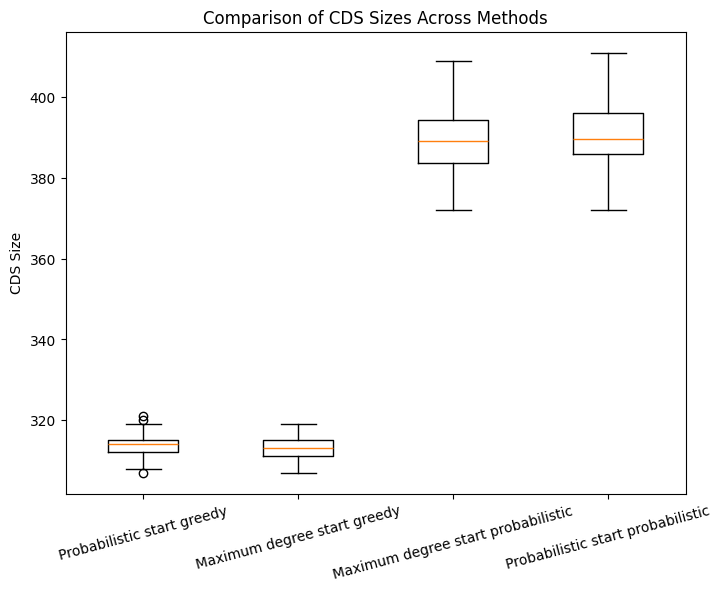

In [12]:
grid_graph = generate_2D_grid_graph(30, 30)

s1 = print_runtime_greedy("Probabilistic start greedy", select_starting_node_8way_probablistic, greedy_connected_dominating_set, grid_graph, num_trials)
s2 = print_runtime_greedy("Maximum degree start greedy", select_starting_node_max_neighbors, greedy_connected_dominating_set, grid_graph, num_trials)
s3 = print_runtime_greedy("Maximum degree start probabilistic", select_starting_node_max_neighbors, probabilistic_greedy_connected_dominating_set, grid_graph, num_trials)
s4 = print_runtime_greedy("Probabilistic start probabilistic", select_starting_node_8way_probablistic, probabilistic_greedy_connected_dominating_set, grid_graph, num_trials)

data = [s1, s2, s3, s4]
labels = [
    "Probabilistic start greedy",
    "Maximum degree start greedy",
    "Maximum degree start probabilistic",
    "Probabilistic start probabilistic"
]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=labels)
plt.ylabel("CDS Size")
plt.title("Comparison of CDS Sizes Across Methods")
plt.xticks(rotation=15)
plt.show()

In [13]:
# Increase trial time latr